In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from scipy import  stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

In [2]:
dta=[10930,10318,10595,10972,7706,6756,9092,10551,9722,10913,11151,8186,6422, 
6337,11649,11652,10310,12043,7937,6476,9662,9570,9981,9331,9449,6773,6304,9355, 
10477,10148,10395,11261,8713,7299,10424,10795,11069,11602,11427,9095,7707,10767, 
12136,12812,12006,12528,10329,7818,11719,11683,12603,11495,13670,11337,10232, 
13261,13230,15535,16837,19598,14823,11622,19391,18177,19994,14723,15694,13248, 
9543,12872,13101,15053,12619,13749,10228,9725,14729,12518,14564,15085,14722, 
11999,9390,13481,14795,15845,15271,14686,11054,10395]
dta=np.array(dta,dtype=np.float)

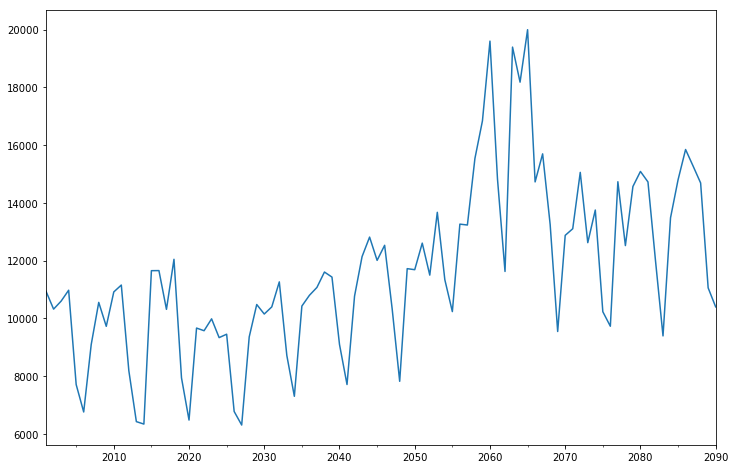

In [3]:
dta=pd.Series(dta)
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('2001','2090'))
dta.plot(figsize = (12,8))
plt.show()

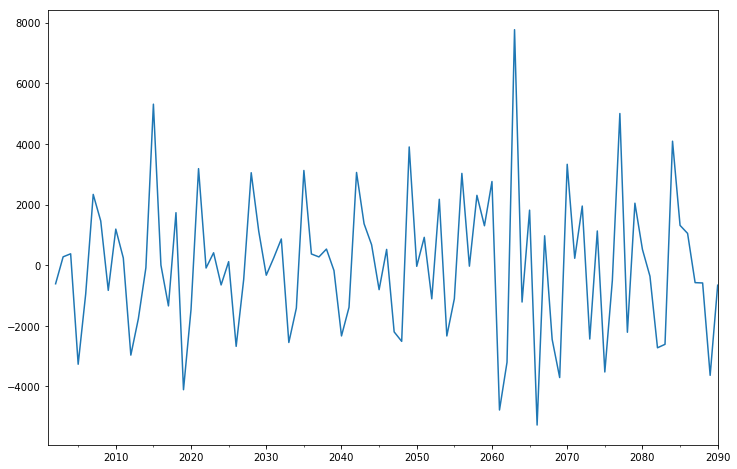

In [6]:
# 对时间序列做d次差分才能得到一个平稳序列，那么可以使用ARIMA(p,d,q)模型，其中d是差分次数
# 平稳的含义是序列值在某一个值附近波动，不具备周期性和趋势性
fig = plt.figure(figsize=(12,8))
ax1= fig.add_subplot(111)
diff1 = dta.diff(1)
diff1.plot(ax=ax1)
plt.show()

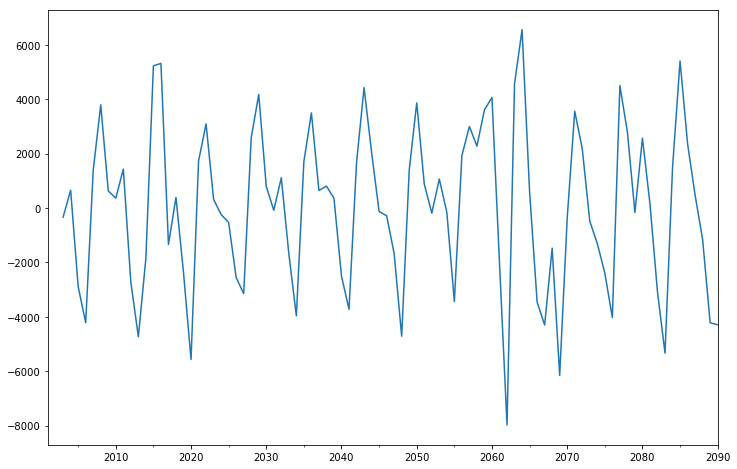

In [7]:
# 做二阶差分
fig = plt.figure(figsize=(12,8))
ax1= fig.add_subplot(111)
diff1 = dta.diff(2)
diff1.plot(ax=ax1)
plt.show()

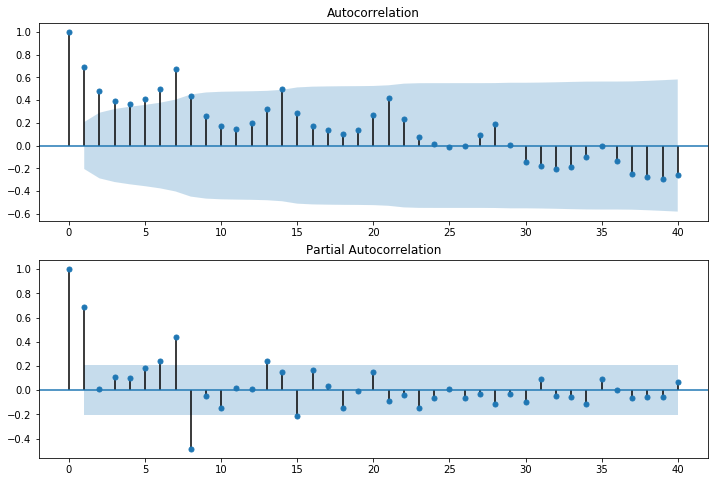

In [11]:
# 平稳时间序列的自相关图和偏自相关图
diff1= dta.diff(1)
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta,lags=40,ax=ax1) # 绘制数据的自相关图
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta,lags=40,ax=ax2) # 绘制数据的偏相关图
plt.show()

In [13]:
"""
1）ARMA(0,1)模型：即自相关图在滞后1阶之后缩小为0，且偏自相关缩小至0，则是一个阶数q=1的移动平均模型； 
2.）ARMA(7,0)模型：即偏自相关图在滞后7阶之后缩小为0，且自相关缩小至0，则是一个阶层p=7的自回归模型； //原文错写为3
3.）ARMA(7,1)模型：即使得自相关和偏自相关都缩小至零。则是一个混合模型。 
4） …还可以有其他供选择的模型 （实际上下文选了ARMA(8,0)）
对应的评判结果为：
* AIC=-2 ln(L) + 2 k 中文名字：赤池信息量 akaike information criterion 
* BIC=-2 ln(L) + ln(n)*k 中文名字：贝叶斯信息量 bayesian information criterion 
* HQ=-2 ln(L) + ln(ln(n))*k hannan-quinn criterion 
增加自由参数的数目提高了拟合的优良性，AIC鼓励数据拟合的优良性但是尽量避免出现过度拟合(Overfitting)的情况。
所以优先考虑的模型应是AIC值最小的那一个。
"""
arma_mod70 = sm.tsa.ARMA(dta,(7,0)).fit()
print(arma_mod70.aic,arma_mod70.bic,arma_mod70.hqic)
arma_mod30 = sm.tsa.ARMA(dta,(0,1)).fit()
print(arma_mod30.aic,arma_mod30.bic,arma_mod30.hqic)
arma_mod71 = sm.tsa.ARMA(dta,(7,1)).fit()
print(arma_mod71.aic,arma_mod71.bic,arma_mod71.hqic)
arma_mod80 = sm.tsa.ARMA(dta,(8,0)).fit()
print(arma_mod80.aic,arma_mod80.bic,arma_mod80.hqic)

C:\Users\zijie\Anaconda2\envs\python3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1619.1918146146843 1641.69010165 1628.26444642
1657.2172614306114 1664.71669044 1660.24147203


C:\Users\zijie\Anaconda2\envs\python3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1605.6865647504549 1630.68466145 1615.76726676
1597.9359968570116 1622.93409356 1608.01669887


C:\Users\zijie\Anaconda2\envs\python3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


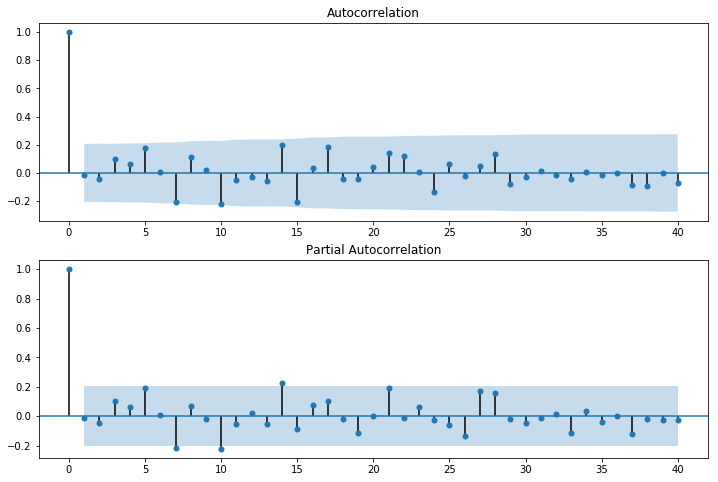

In [14]:
"""
残差的ACF和PACF图，可以看到序列残差基本为白噪声
"""
resid = arma_mod80.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)
plt.show()

In [15]:
"""
德宾-沃森检验,简称D-W检验，是目前检验自相关性最常用的方法，但它只使用于检验一阶自相关性。
因为自相关系数ρ的值介于-1和1之间，所以 0≤DW≤４。
并且DW＝O＝＞ρ＝１　即存在正自相关性 
DW＝４＜＝＞ρ＝－１　即存在负自相关性 
DW＝２＜＝＞ρ＝０　　即不存在（一阶）自相关性 
因此，当DW值显著的接近于O或４时，则存在自相关性，而接近于２时，则不存在（一阶）自相关性。
这样只要知道ＤＷ统计量的概率分布，在给定的显著水平下，根据临界值的位置就可以对原假设Ｈ０进行检验。
"""
 # 结果=2.02332930932，所以残差序列不存在自相关性。
print(sm.stats.durbin_watson(arma_mod80.resid.values))

2.02334956886


NormaltestResult(statistic=7.3447667215422889, pvalue=0.025415822628550761)


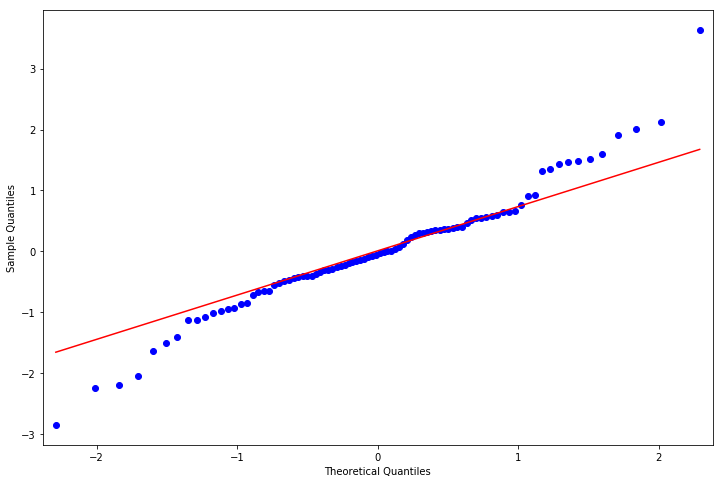

In [18]:
'''
观察是否符合正态分布
这里使用QQ图，它用于直观验证一组数据是否来自某个分布，或者验证某两组数据是否来自同一（族）分布。
'''
print(stats.normaltest(resid))
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)
plt.show()

In [19]:
#  残差序列Ljung-Box检验，也叫Q检验
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True) # q检验
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0  -0.014760   0.020269  0.886789
2.0  -0.045488   0.214961  0.898094
3.0   0.101656   1.198469  0.753372
4.0   0.063387   1.585310  0.811430
5.0   0.176090   4.605823  0.465851
6.0   0.005096   4.608382  0.594928
7.0  -0.208976   8.964954  0.255182
8.0   0.115678  10.316145  0.243534
9.0   0.020846  10.360568  0.322091
10.0 -0.220038  15.371716  0.119086
11.0 -0.050545  15.639489  0.155051
12.0 -0.031570  15.745287  0.203183
13.0 -0.055323  16.074407  0.245135
14.0  0.195338  20.231507  0.123010
15.0 -0.204416  24.844685  0.052069
16.0  0.034591  24.978568  0.070204
17.0  0.181386  28.710345  0.037292
18.0 -0.043263  28.925593  0.049296
19.0 -0.045290  29.164804  0.063437
20.0  0.044189  29.395778  0.080254
21.0  0.142033  31.816572  0.061101
22.0  0.118150  33.516339  0.054971
23.0  0.004533  33.518879  0.072442
24.0 -0.133543  35.756192  0.057948
25.0  0.061863  36.243695  0.067983
26.0 -0.021887  36.305671  0

In [20]:
# 进行拟合
predict_dta = arma_mod80.predict('2090', '2100', dynamic=True)
print(predict_dta)

2090-12-31     9542.278439
2091-12-31    12907.307171
2092-12-31    13980.965894
2093-12-31    14501.204985
2094-12-31    13893.774274
2095-12-31    13249.417834
2096-12-31    10961.713313
2097-12-31    10072.947752
2098-12-31    12683.216201
2099-12-31    13476.384364
2100-12-31    13615.590759
Freq: A-DEC, dtype: float64


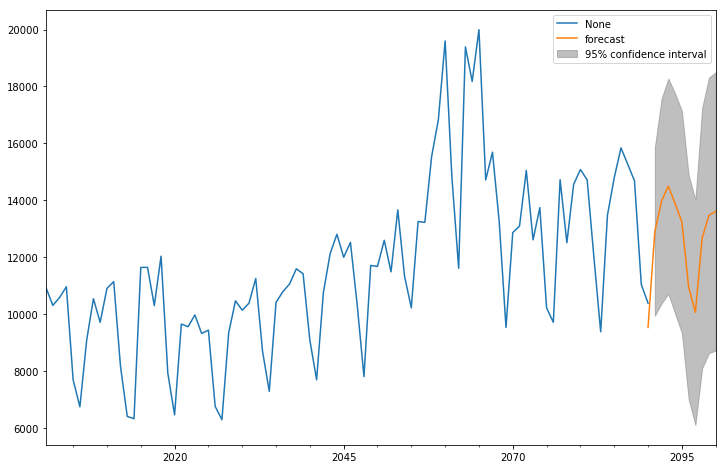

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.ix['2000':].plot(ax=ax)
fig = arma_mod80.plot_predict('2090', '2100', dynamic=True, ax=ax, plot_insample=False)
plt.show()